# Análisis Exploratorio de Datos (E.D.A.)

In [1]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Leer el csv 
DATOS_MOVIES = pd.read_csv('MD_DATA.csv')
DATOS_MOVIES.head(3)

C:\Users\ABANIBI\AppData\Local\Temp\ipykernel_3812\1805655452.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  DATOS_MOVIES = pd.read_csv('MD_DATA.csv')


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return,month,weekday
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,81.0,['English'],Released,NaN,Toy Story,7.7,1995.0,12.451801,Octubre,Lunes
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995.0,4.043035,Diciembre,Viernes
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.7129,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995.0,0.000000,Diciembre,Viernes


In [4]:
#Verificamos registros y columnas
DATOS_MOVIES.shape

(45379, 21)

In [6]:
#Revisamos columnas 
DATOS_MOVIES.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'release_year', 'return', 'month', 'weekday'],
      dtype='object')

In [7]:
#Observacion de valores nulos y tipos de datos
DATOS_MOVIES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  float64
 2   genres                 45379 non-null  object 
 3   id                     45379 non-null  object 
 4   original_language      45368 non-null  object 
 5   overview               44438 non-null  object 
 6   popularity             45377 non-null  object 
 7   production_companies   45379 non-null  object 
 8   production_countries   45379 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45379 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45379 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [8]:
DATOS_MOVIES = DATOS_MOVIES[['budget', 'genres', 'popularity', 'revenue',
                        'status', 'title', 'vote_average', 'return']].copy()

In [9]:
DATOS_MOVIES.dtypes

budget          float64
genres           object
popularity       object
revenue         float64
status           object
title            object
vote_average    float64
return          float64
dtype: object

In [10]:
DATOS_MOVIES.shape

(45379, 8)

In [11]:
DATOS_MOVIES = DATOS_MOVIES.rename(columns={'budget':'Budget', 'genres':'Genres', 'popularity':'Popularity', 'revenue':'Revenue',
                        'status':'Status', 'title':'Title', 'vote_average':'Vote Average', 'return':'Return'})

In [12]:
DATOS_MOVIES.head(3)

,Budget,Genres,Popularity,Revenue,Status,Title,Vote Average,Return
0,30000000.0,"['Animation', 'Comedy', 'Family']",21.946943,373554033.0,Released,Toy Story,7.7,12.451801
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",17.015539,262797249.0,Released,Jumanji,6.9,4.043035
2,0.0,"['Romance', 'Comedy']",11.7129,0.0,Released,Grumpier Old Men,6.5,0.000000


In [13]:
DATOS_MOVIES.isna().sum() #nulos

Budget           3
Genres           0
Popularity       2
Revenue          0
Status          83
Title            3
Vote Average     3
Return           0
dtype: int64

<Axes: xlabel='Title'>

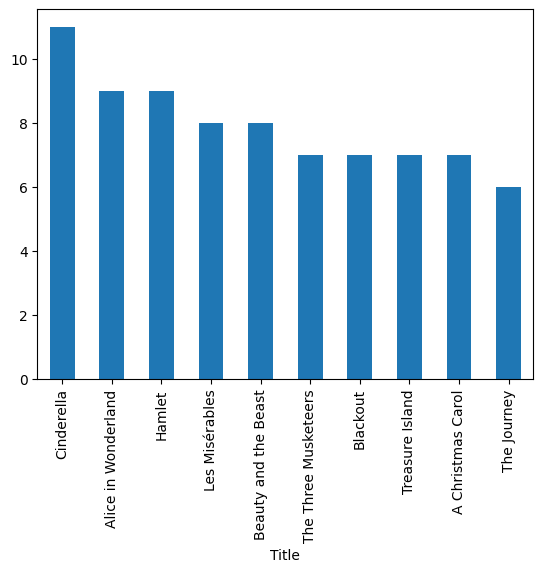

In [14]:
DATOS_MOVIES['Title'].value_counts().head(10).plot(kind='bar')

In [15]:
DATOS_MOVIES['Popularity'] = pd.to_numeric(DATOS_MOVIES['Popularity'], errors='coerce').astype(float)

In [16]:
DATOS_MOVIES['Popularity'].dtype

dtype('float64')

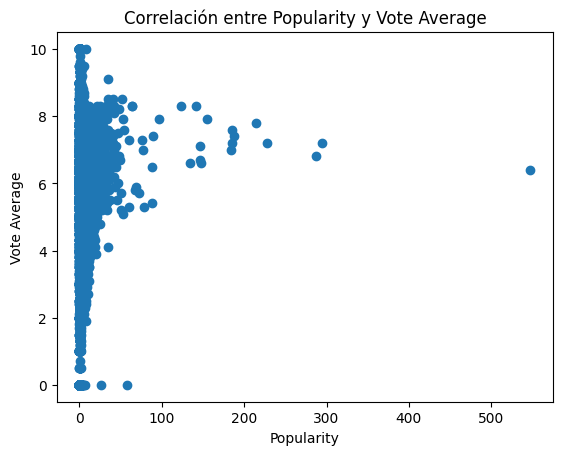

In [17]:
DATOS_MOVIES['Popularity'].corr(DATOS_MOVIES['Vote Average'])
plt.scatter(DATOS_MOVIES['Popularity'], DATOS_MOVIES['Vote Average'])
plt.title('Correlación entre Popularity y Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

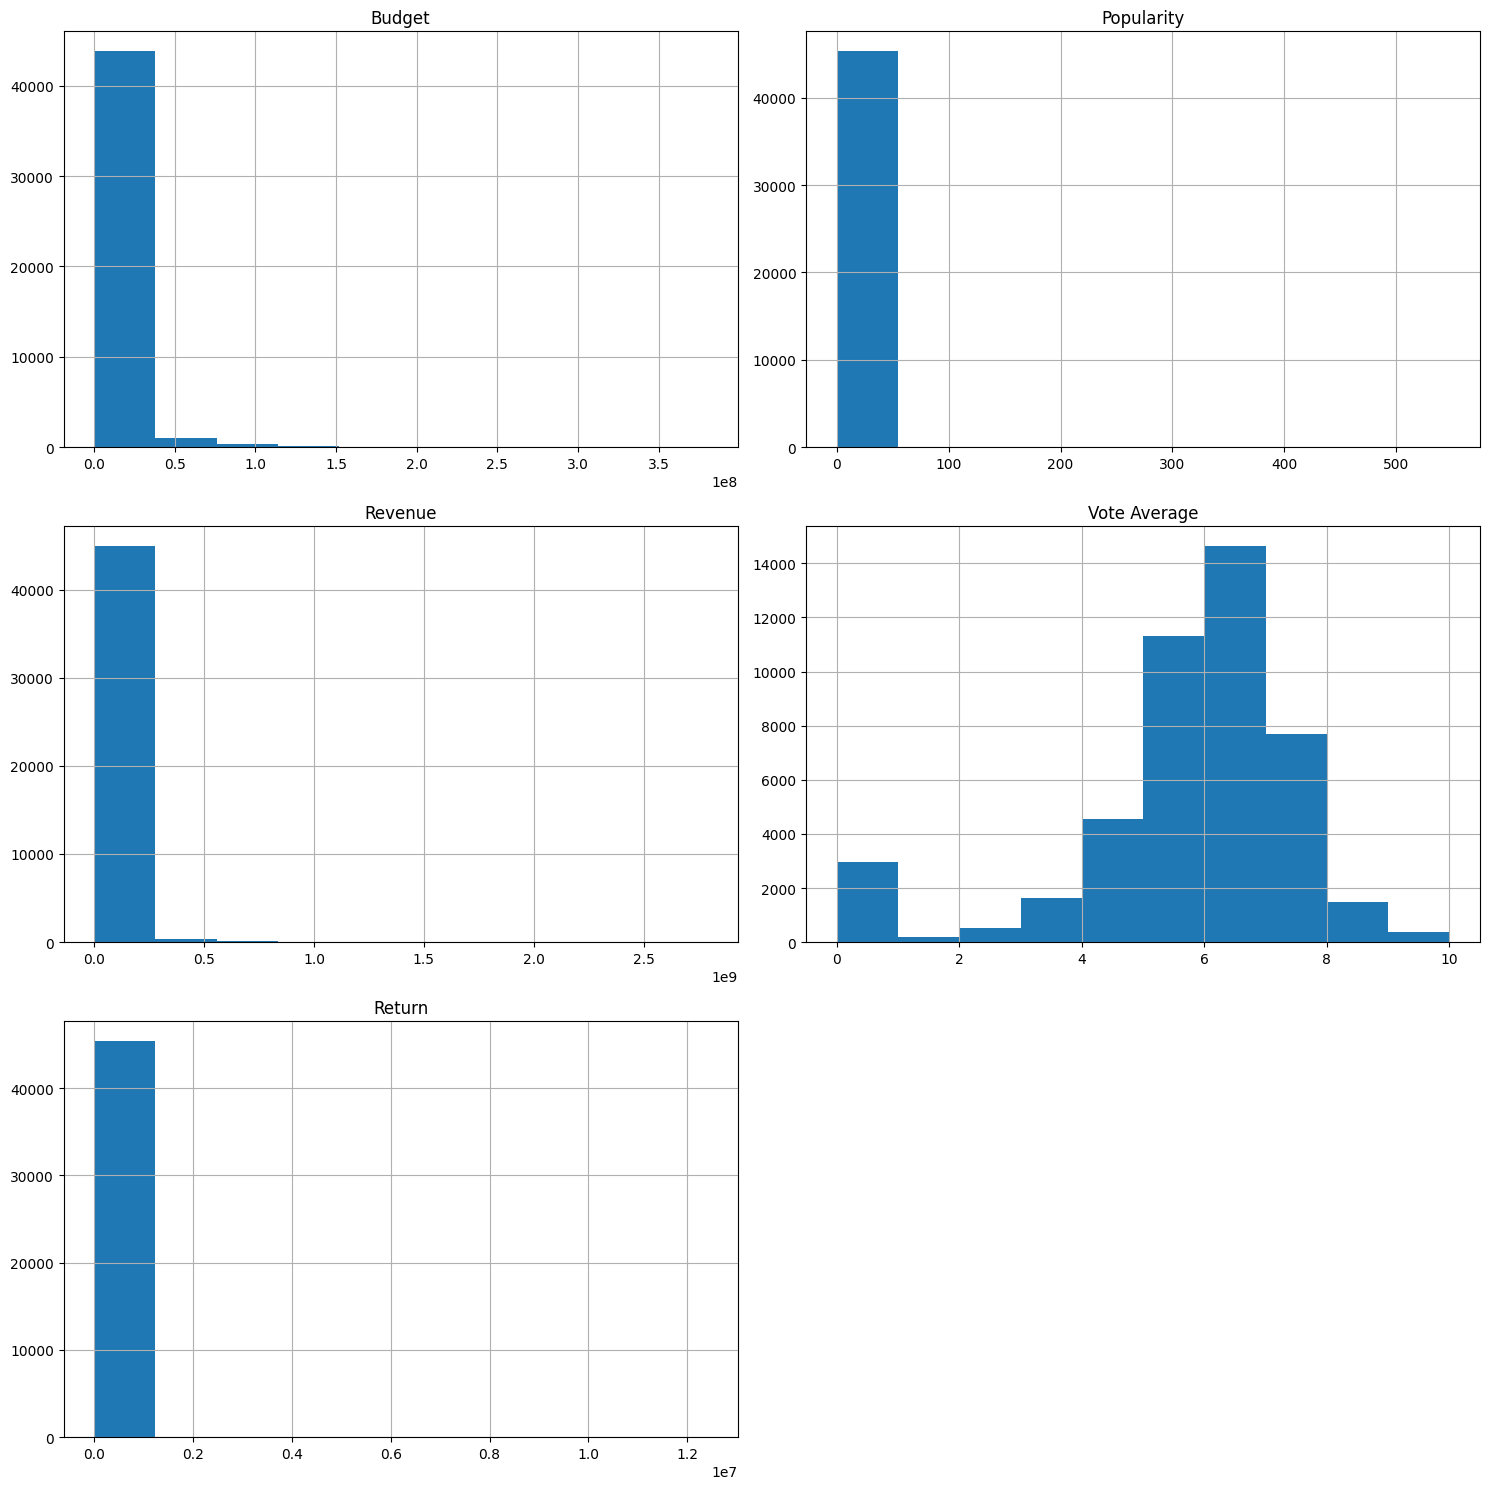

In [18]:
#Generamos histograma para visualizar la data
DATOS_MOVIES.hist(figsize=(15,15)) 
plt.tight_layout() 
plt.show()